<a href="https://colab.research.google.com/github/tamannak12/Crime_against_women/blob/main/Crime_against_women_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset

> Add blockquote



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv('/content/CrimesOnWomenData.csv')
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [ ]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,726,727,728,729,730,731,732,733,734,735
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,726,727,728,729,730,731,732,733,734,735
State,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHHATTISGARH,GOA,GUJARAT,HARYANA,HIMACHAL PRADESH,JAMMU & KASHMIR,...,Uttar Pradesh,Uttarakhand,West Bengal,A & N Islands,Chandigarh,D&N Haveli,Daman & Diu,Delhi UT,Lakshadweep,Puducherry
Year,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
Rape,871,33,817,888,959,12,286,398,124,169,...,534,1123,15,74,3,1250,315,2,0,2
K&A,765,55,1070,518,171,6,857,297,105,504,...,402,7376,0,120,23,4083,904,1,0,0
DD,420,0,59,859,70,2,67,285,10,13,...,72,454,1,4,0,141,16,0,0,2
AoW,3544,78,850,562,1763,17,756,478,310,622,...,655,2485,32,37,7,2068,1851,5,1,31
AoM,2271,3,4,21,161,7,111,401,14,288,...,13,424,4,6,0,417,10,1,1,3
DV,5791,11,1248,1558,840,11,3667,1513,317,50,...,519,19952,4,95,6,4731,501,9,3,12
WT,7,0,0,83,0,0,0,0,0,0,...,17,50,0,0,0,4,1,0,0,0


# Data Cleaning

In [ ]:
df = df.rename(columns={'Rape': 'Rape',
                        'K&A': 'Kidnap & Assault',
                        'DD': 'Dahej Dowry',
                        'AoW': 'Assault on Women',
                        'AoM': 'Assault on Minors',
                        'DV': 'Domestic Violence',
                        'WT': 'Witchcraft and related'})

Data Analysis

In [ ]:
df['Total'] = df[['Rape','Kidnap & Assault','Dahej Dowry','Assault on Women','Assault on Minors','Domestic Violence','Witchcraft and related']].sum(axis=1)
df

,Unnamed: 0,State,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,13669
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,180
2,2,ASSAM,2001,817,1070,59,850,4,1248,0,4048
3,3,BIHAR,2001,888,518,859,562,21,1558,83,4489
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,3964
...,...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4,12694
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1,3598
733,733,Delhi UT,2021,2,1,0,5,1,9,0,18
734,734,Lakshadweep,2021,0,0,0,1,1,3,0,5


In [ ]:
total_cases=df['Total'].max()
total_cases

52246

In [ ]:
state_with_max_cases=df['State'].idxmax()
state_with_max_cases
high_cases=df.loc[state_with_max_cases]
high_cases

,368
Unnamed: 0,368
State,West Bengal
Year,2011
Rape,2363
Kidnap & Assault,3711
Dahej Dowry,510
Assault on Women,0
Assault on Minors,200
Domestic Violence,19772
Witchcraft and related,96


west bengal with highest cases

In [ ]:
state_with_min_cases=df['State'].idxmin()
state_with_min_cases
least_cases=df.loc[state_with_min_cases]
least_cases

,28
Unnamed: 0,28
State,A & N ISLANDS
Year,2001
Rape,3
Kidnap & Assault,2
Dahej Dowry,0
Assault on Women,19
Assault on Minors,1
Domestic Violence,9
Witchcraft and related,0


A&N island with least cases

In [ ]:
df['Rape'].sum()

535702

In [ ]:
high_rape=df['Rape'].idxmax()
high_rape
state_rape=df.loc[high_rape]
state_rape

,720
Unnamed: 0,720
State,Punjab
Year,2021
Rape,6337
Kidnap & Assault,5964
Dahej Dowry,452
Assault on Women,9079
Assault on Minors,73
Domestic Violence,16949
Witchcraft and related,40


Punjab has highest rape cases

In [ ]:
least_rape=df['Rape'].idxmin()
least_rape
state__rape=df.loc[least_rape]
state__rape

,31
Unnamed: 0,31
State,DAMAN & DIU
Year,2001
Rape,0
Kidnap & Assault,3
Dahej Dowry,0
Assault on Women,0
Assault on Minors,0
Domestic Violence,4
Witchcraft and related,0


Daman and diu with least rape cases

Grouping

In [ ]:
df=df.set_index('State')
df.head()

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
ANDHRA PRADESH,0,2001,871,765,420,3544,2271,5791,7,13669
ARUNACHAL PRADESH,1,2001,33,55,0,78,3,11,0,180
ASSAM,2,2001,817,1070,59,850,4,1248,0,4048
BIHAR,3,2001,888,518,859,562,21,1558,83,4489
CHHATTISGARH,4,2001,959,171,70,1763,161,840,0,3964


In [ ]:
df.groupby('State').agg({'Total':np.average}).head(10)

,Total
State,
A & N ISLANDS,47.500000
A & N Islands,126.636364
ANDHRA PRADESH,19108.100000
ARUNACHAL PRADESH,165.800000
ASSAM,6857.000000
Andhra Pradesh,18185.636364
Arunachal Pradesh,287.636364
Assam,20310.000000
BIHAR,6133.200000


In [ ]:
df.groupby('State').agg({'Total':np.nanmean}).head(10)

<ipython-input-15-a526089fa9a6>:1: FutureWarning: The provided callable <function nanmean at 0x7ac87372e950> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('State').agg({'Total':np.nanmean}).head(10)


,Total
State,
A & N ISLANDS,47.500000
A & N Islands,126.636364
ANDHRA PRADESH,19108.100000
ARUNACHAL PRADESH,165.800000
ASSAM,6857.000000
Andhra Pradesh,18185.636364
Arunachal Pradesh,287.636364
Assam,20310.000000
BIHAR,6133.200000


In [ ]:
df.groupby('Total').filter(lambda x:len(x)>=5)

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
LAKSHADWEEP,32,2001,0,0,0,0,0,0,0,0
NAGALAND,52,2002,17,4,0,1,0,0,0,22
A & N ISLANDS,96,2003,2,2,0,9,2,7,0,22
D & N HAVELI,132,2004,7,7,0,5,0,3,0,22
A & N ISLANDS,164,2005,4,1,0,11,1,5,0,22
LAKSHADWEEP,168,2005,0,0,0,0,0,0,0,0
DAMAN & DIU,201,2006,3,1,0,2,0,2,0,8
DAMAN & DIU,337,2010,1,2,0,2,0,3,0,8
LAKSHADWEEP,338,2010,0,0,0,0,0,0,0,0


In [ ]:
masked_df=df['Total']>10000
masked_df.head()
df.where(masked_df).head()

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
ANDHRA PRADESH,0.0,2001.0,871.0,765.0,420.0,3544.0,2271.0,5791.0,7.0,13669.0
ARUNACHAL PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASSAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIHAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHHATTISGARH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.where(masked_df).dropna().head()

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
ANDHRA PRADESH,0.0,2001.0,871.0,765.0,420.0,3544.0,2271.0,5791.0,7.0,13669.0
MADHYA PRADESH,13.0,2001.0,2851.0,668.0,609.0,7063.0,751.0,2562.0,0.0,14504.0
MAHARASHTRA,14.0,2001.0,1302.0,611.0,308.0,2823.0,1120.0,6090.0,1.0,12255.0
RAJASTHAN,21.0,2001.0,1049.0,2165.0,376.0,2878.0,56.0,5532.0,1.0,12057.0
UTTAR PRADESH,25.0,2001.0,1958.0,2879.0,2211.0,2870.0,2575.0,7365.0,0.0,19858.0


In [ ]:
df['Total'].unique

<bound method Series.unique of State
ANDHRA PRADESH       13669
ARUNACHAL PRADESH      180
ASSAM                 4048
BIHAR                 4489
CHHATTISGARH          3964
                     ...  
D&N Haveli           12694
Daman & Diu           3598
Delhi UT                18
Lakshadweep              5
Puducherry              50
Name: Total, Length: 736, dtype: int64>

In [ ]:
miss_df=df.isnull()
miss_df

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
ANDHRA PRADESH,False,False,False,False,False,False,False,False,False,False
ARUNACHAL PRADESH,False,False,False,False,False,False,False,False,False,False
ASSAM,False,False,False,False,False,False,False,False,False,False
BIHAR,False,False,False,False,False,False,False,False,False,False
CHHATTISGARH,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
D&N Haveli,False,False,False,False,False,False,False,False,False,False
Daman & Diu,False,False,False,False,False,False,False,False,False,False
Delhi UT,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna().head(10)

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
ANDHRA PRADESH,0,2001,871,765,420,3544,2271,5791,7,13669
ARUNACHAL PRADESH,1,2001,33,55,0,78,3,11,0,180
ASSAM,2,2001,817,1070,59,850,4,1248,0,4048
BIHAR,3,2001,888,518,859,562,21,1558,83,4489
CHHATTISGARH,4,2001,959,171,70,1763,161,840,0,3964
GOA,5,2001,12,6,2,17,7,11,0,55
GUJARAT,6,2001,286,857,67,756,111,3667,0,5744
HARYANA,7,2001,398,297,285,478,401,1513,0,3372
HIMACHAL PRADESH,8,2001,124,105,10,310,14,317,0,880


In [ ]:
df.fillna(0, inplace=True)
df.head(10)

,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total
State,,,,,,,,,,
ANDHRA PRADESH,0,2001,871,765,420,3544,2271,5791,7,13669
ARUNACHAL PRADESH,1,2001,33,55,0,78,3,11,0,180
ASSAM,2,2001,817,1070,59,850,4,1248,0,4048
BIHAR,3,2001,888,518,859,562,21,1558,83,4489
CHHATTISGARH,4,2001,959,171,70,1763,161,840,0,3964
GOA,5,2001,12,6,2,17,7,11,0,55
GUJARAT,6,2001,286,857,67,756,111,3667,0,5744
HARYANA,7,2001,398,297,285,478,401,1513,0,3372
HIMACHAL PRADESH,8,2001,124,105,10,310,14,317,0,880


In [ ]:
df.pivot_table(values='Total',index='State',aggfunc=[np.mean,np.max], margins=True).head()

<ipython-input-23-c645f05589a9>:1: FutureWarning: The provided callable <function mean at 0x7ac873cec310> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='Total',index='State',aggfunc=[np.mean,np.max], margins=True).head()
<ipython-input-23-c645f05589a9>:1: FutureWarning: The provided callable <function max at 0x7ac873ccb9a0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values='Total',index='State',aggfunc=[np.mean,np.max], margins=True).head()


,mean,max
,Total,Total
State,,
A & N ISLANDS,47.500000,91
A & N Islands,126.636364,336
ANDHRA PRADESH,19108.100000,24757
ARUNACHAL PRADESH,165.800000,190
ASSAM,6857.000000,11493


#Data Visualization

Barplot

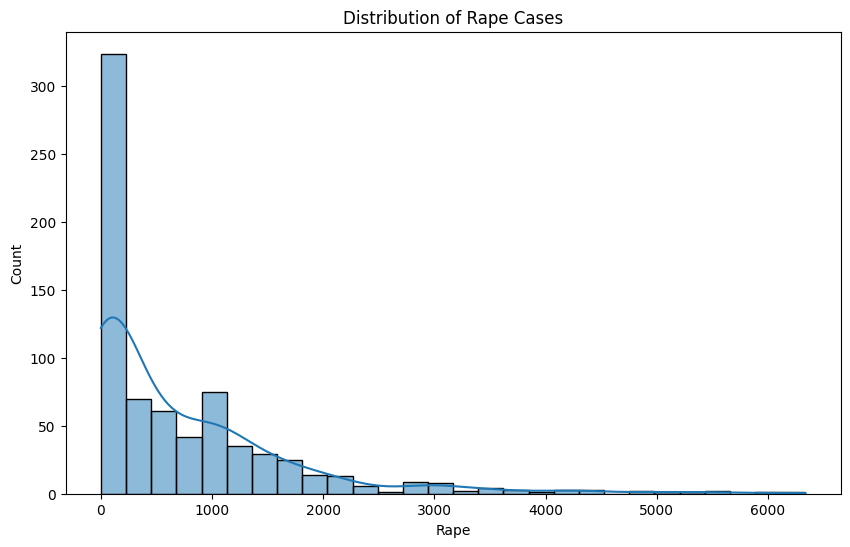

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rape'], kde=True)
plt.title('Distribution of Rape Cases')
plt.show()


Boxplot

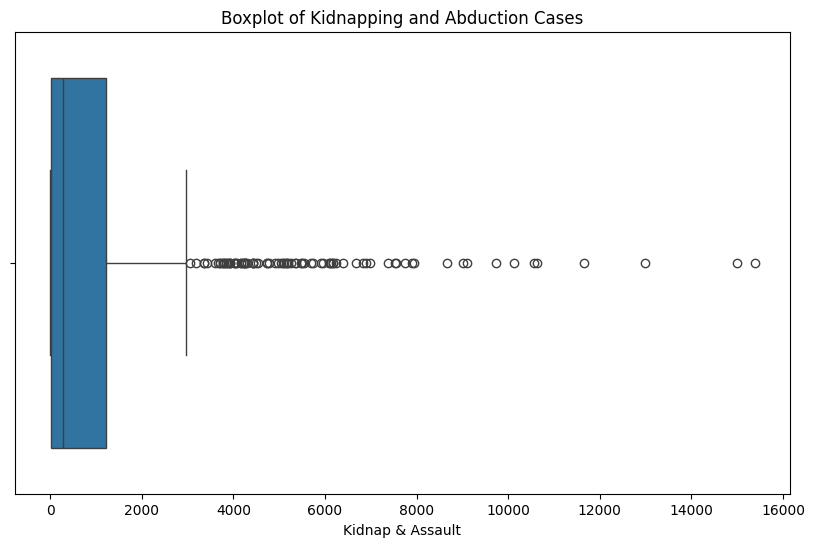

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Kidnap & Assault'])
plt.title('Boxplot of Kidnapping and Abduction Cases')
plt.show()

 Correlation Heatmap

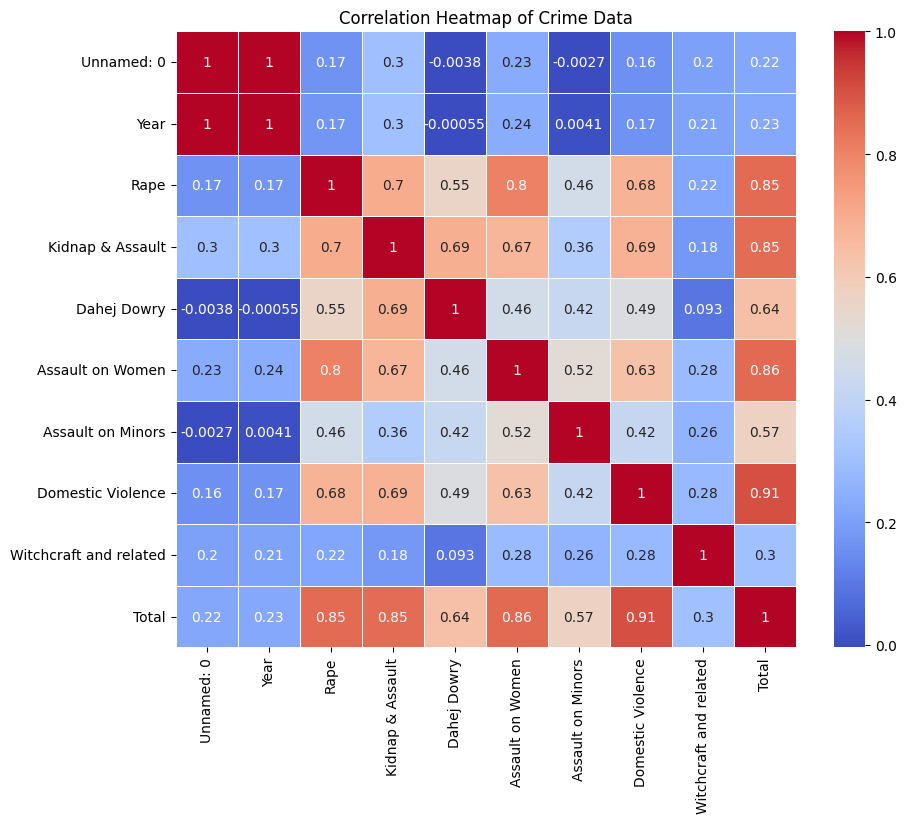

In [ ]:

df['Year'] = df['Year'].replace({'Early 2000s': 2003,
                                   'Late 2000s': 2007})

#Ensure all values in the DataFrame are numeric
df = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Crime Data')
plt.show()

Pairplot

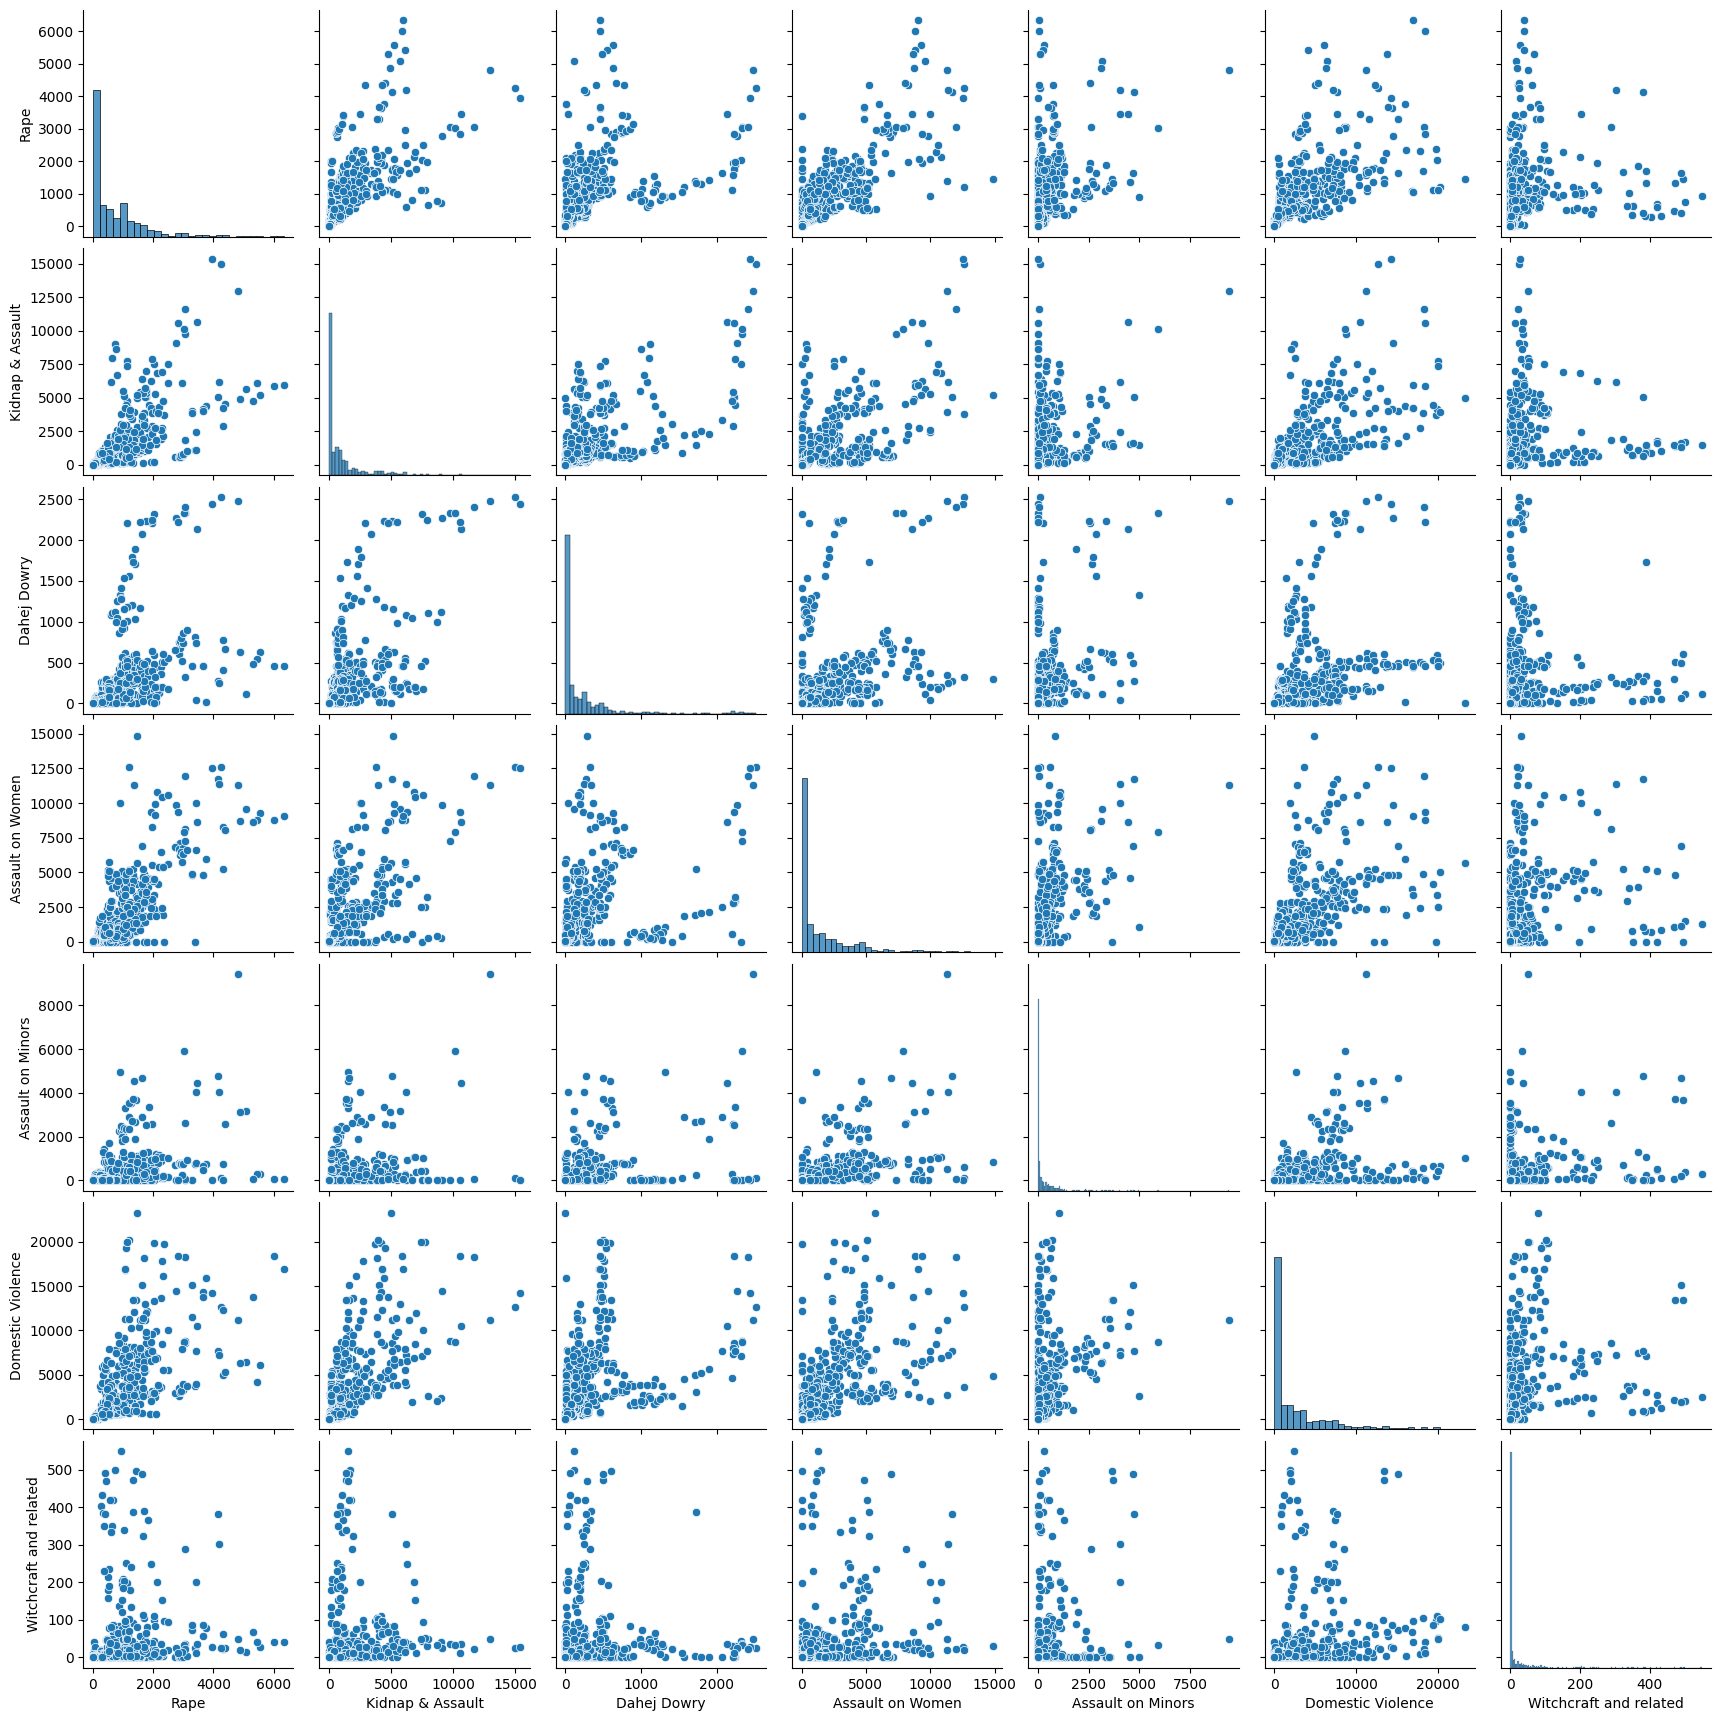

In [ ]:
sns.pairplot(df[['Rape','Kidnap & Assault','Dahej Dowry','Assault on Women','Assault on Minors','Domestic Violence','Witchcraft and related']])
plt.show()

#Feature Engineering (ML involved)


Trend Based Feature

In [ ]:
df['Rape_YoY_Change'] = df.groupby('State')['Rape'].pct_change()
df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total,Rape_YoY_Change
State,,,,,,,,,,,
ANDHRA PRADESH,0,2001,871,765,420,3544,2271,5791,7,13669,NaN
ARUNACHAL PRADESH,1,2001,33,55,0,78,3,11,0,180,NaN
ASSAM,2,2001,817,1070,59,850,4,1248,0,4048,NaN
BIHAR,3,2001,888,518,859,562,21,1558,83,4489,NaN
CHHATTISGARH,4,2001,959,171,70,1763,161,840,0,3964,NaN
...,...,...,...,...,...,...,...,...,...,...,...
D&N Haveli,731,2021,1250,4083,141,2068,417,4731,4,12694,0.253761
Daman & Diu,732,2021,315,904,16,1851,10,501,1,3598,0.296296
Delhi UT,733,2021,2,1,0,5,1,9,0,18,0.000000


Crime Ratio

In [ ]:
df['Women_Crimes_Ratio'] = df[['Rape','Kidnap & Assault','Dahej Dowry','Assault on Women','Assault on Minors','Domestic Violence','Witchcraft and related']].sum(axis=1) / df['Total']
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Year,Rape,Kidnap & Assault,Dahej Dowry,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft and related,Total,Rape_YoY_Change,Women_Crimes_Ratio
State,,,,,,,,,,,,
ANDHRA PRADESH,0,2001,871,765,420,3544,2271,5791,7,13669,NaN,1.0
ARUNACHAL PRADESH,1,2001,33,55,0,78,3,11,0,180,NaN,1.0
ASSAM,2,2001,817,1070,59,850,4,1248,0,4048,NaN,1.0
BIHAR,3,2001,888,518,859,562,21,1558,83,4489,NaN,1.0
CHHATTISGARH,4,2001,959,171,70,1763,161,840,0,3964,NaN,1.0


Time-Based Features

In [ ]:
df['Period'] = pd.cut(df['Year'], bins=[2000, 2005, 2010, 2015, 2020], labels=['Early 2000s', 'Mid 2000s', 'Late 2000s', '2010s'])

Outliners

In [ ]:
import numpy as np

def flag_outliers_zscore(column):
    z_scores = (column - column.mean()) / column.std()
    outliers = np.abs(z_scores) > 3
    return outliers

df['Rape_Outlier_Z'] = flag_outliers_zscore(df['Rape'])
df['KA_Outlier_Z'] = flag_outliers_zscore(df['Kidnap & Assault'])

df[['Rape', 'Rape_Outlier_Z', 'Kidnap & Assault', 'KA_Outlier_Z']]


,Rape,Rape_Outlier_Z,Kidnap & Assault,KA_Outlier_Z
State,,,,
ANDHRA PRADESH,871,False,765,False
ARUNACHAL PRADESH,33,False,55,False
ASSAM,817,False,1070,False
BIHAR,888,False,518,False
CHHATTISGARH,959,False,171,False
...,...,...,...,...
D&N Haveli,1250,False,4083,False
Daman & Diu,315,False,904,False
Delhi UT,2,False,1,False


Visualizing Outliers


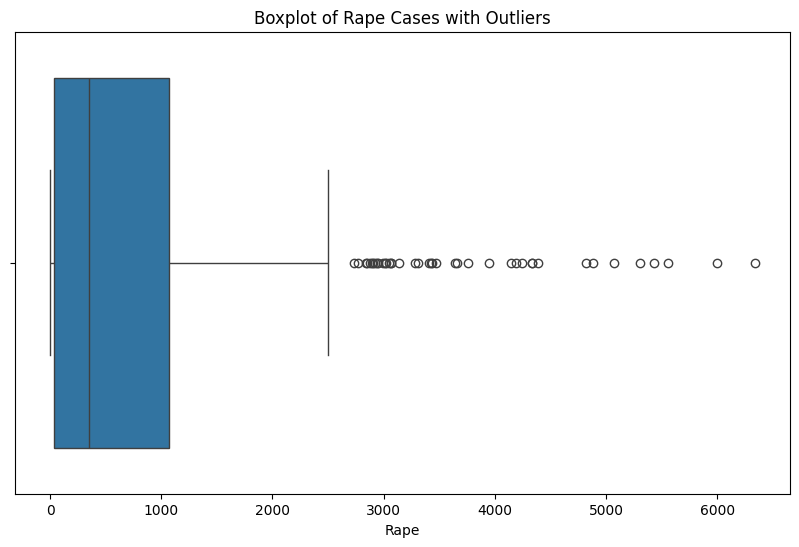

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rape', data=df)
plt.title('Boxplot of Rape Cases with Outliers')
plt.show()